# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Muammar Farhan]
- **Email:** [muammarfarhan09@gmail.com]
- **ID Dicoding:** [arfahanz31]

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan musim dengan jumlah pengguna Sepeda
- Bagaimana hubungan jumlah penyewa sepeda pada saat holiday serta weekend dengan hari kerja
- Bagaimana hubungan holiday, dengan tidak holiday terhadap jumlah penyewa sepeda
- Bagaimana performa bike sharing dari tahun ke tahun

## Import Semua Packages/Library yang Digunakan

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [310]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [311]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berdasarkan 2 tabel diatas didapatkan beberapa data penting seperti jumlah pengguna resmi (registered) dan tidak resmi (casual) serta jumlah pengguna total keselurahan baik dari yang jam atau hari.
- Didapatkan juga data untuk perbandingan seperti season untuk perbadingan, holiday untuk perbandingan,dan ada juga tanggal serta atribut lainnya yang dapat digunakan untuk perbandingan dan menjawab pertanyaan.
- Kemudian pada tahun juga keterangan 0 dan 1 walau sudah tertera jelas pada datetime tahun berapa harus dideskripsikan dengan jelas jadi nanti di cleaning data menjadi yang sesuai

### Assessing Data

In [312]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [313]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [314]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [315]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [316]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [317]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [318]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [319]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan Assesing data yang kita dapatkan, mendapatkan beberapa kesimpulan dan harus diganti agar dapat menjawab pertanyaan pertanyaan diatas yang dibuat diawal setelah melakukan pengecekan satu satu apakah ada duplicate data ternyata tidak ada, apakah ada missing value dan total value keseluruhan sesuai, apakah ada value yang tidak akurat menurut saya masih masuk data konsisten.
- Namun untuk menjawab pertanyaan perlu melakukan perubahan pada bagian season dimana tiap angka 1,2,3,4 mewakili musim apa 1:Springer 2:Summer 3:Fall 4:Winter, kemudian pada holiday terdapat 0 atau 1 akan mewakili sebagai 0:Not Holiday dan 1: Holiday, kemudian pada workingday juga terdapat 2 value yang menurut saya harus diganti untuk menjawab pertanyaan dimana sesuai readme 0:Weekend/Holiday dan 1:Weekday. tentunya tipedata yang ada harus diubah juga.

### Cleaning Data

In [320]:
#Kita akan ubah dari Season dan mengubah kedua isi file

day_df.columns

# Atribut
# 0 = Instant, 1 = dteday, 2 = season ...... 13 = casual, 14 = registered, cnt = 15

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [321]:
# Mencek isi Atribut Pada Season dalam file Day
pd.unique(day_df['season'])


array([1, 2, 3, 4])

In [367]:
# Coba ganti isi atribut Season pada file day.csv dengan yang sesuai Readme
day_df['season'] = day_df['season'].astype(str)

musim = ['springer', 'summer', 'fall', 'winter']
day_df['season'] = day_df['season'].replace(['1', '2', '3','4'], musim)
print(day_df['season'].unique())

['springer' 'summer' 'fall' 'winter']


In [323]:
# Melakukan perubahan pada file Hour agar data konsisten
#Kita akan ubah dari Season dan mengubah kedua isi file

hour_df.columns

# Atribut Hour terdapat 1 tambahan baru otomatis index akan berubah
# 0 = Instant, 1 = dteday, 2 = season ...... 14 = casual, 15 = registered, cnt = 16

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [324]:
#Cek isi atribut dalam file Hour pada atribut season
pd.unique(hour_df['season'])

array([1, 2, 3, 4])

In [369]:
# Coba ganti isi atribut Season pada file hour.csv dengan yang sesuai Readme
#Ganti TIpe data INT ke String
hour_df['season'] = hour_df['season'].astype(str)

musim = ['springer', 'summer', 'fall', 'winter']
hour_df['season'] = hour_df['season'].replace(['1', '2', '3', '4'], musim)
print(hour_df['season'].unique())

['springer' 'summer' 'fall' 'winter']


In [327]:
# Melakukan perubahan tipe data pada colom atribut holiday integer diganti dengan string serta melakukan perubahan isi pada file day.csv
day_df.columns

# Atribut
# 0 = Instant, 1 = dteday, 2 = season, 3 = yr, 4 = mnth, 5 = holiday ...... 13 = casual, 14 = registered, cnt = 15

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [328]:
#Cek isi atribut dalam file day.csv pada atribut holiday
pd.unique(day_df['holiday'])

array([0, 1])

In [329]:
# Coba ganti isi atribut holiday pada file day.csv dengan yang sesuai Readme
#Ganti Tipe data INT ke String
day_df['holiday'] = day_df['holiday'].astype(str)

holidayornot = ['Not Holiday', 'Holiday']
day_df['holiday'] = day_df['holiday'].replace(['0', '1'], holidayornot)
day_df = day_df[day_df['holiday'] != 'nan']
print(day_df['holiday'].unique())

['Not Holiday' 'Holiday']


In [330]:
#Memastikan tipe data sudah berubah pada atribut holiday dalam file day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    object 
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.5+ KB


In [331]:
# Melakukan perubahan tipe data pada colom atribut holiday integer diganti dengan string serta melakukan perubahan isi pada file hour.csv
hour_df.columns

# Atribut
# 0 = Instant, 1 = dteday, 2 = season, 3 = yr, 4 = mnth, 5 = hr,  6 = holiday ...... 14 = casual, 15 = registered, cnt = 16

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [332]:
#Cek isi atribut dalam file hour.csv pada atribut holiday
pd.unique(hour_df['holiday'])

array([0, 1])

In [333]:
# Coba ganti isi atribut holiday pada file hour.csv dengan yang sesuai Readme
#Ganti Tipe data INT ke String
hour_df['holiday'] = hour_df['holiday'].astype(str)

holidayornot = ['Not Holiday', 'Holiday']
hour_df['holiday'] = hour_df['holiday'].replace(['0', '1'], holidayornot)
print(day_df['holiday'].unique())

['Not Holiday' 'Holiday']


In [334]:
#Memastikan tipe data sudah berubah pada atribut holiday dalam file day.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  object 
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10), object(3)
memory usage: 2.3+ MB


In [335]:
# Melakukan perubahan tipe data pada colom atribut workingday integer diganti dengan string serta melakukan perubahan isi pada file day.csv
day_df.columns

# Atribut
# 7 = holiday ...... 13 = casual, 14 = registered, cnt = 15

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [336]:
#Cek isi atribut dalam file day.csv pada atribut workingday
pd.unique(day_df['workingday'])

array([0, 1])

In [337]:
# Coba ganti isi atribut workingday pada file day.csv dengan yang sesuai Readme
#Ganti Tipe data INT ke String
day_df['workingday'] = day_df['workingday'].astype(str)

workday = ['Weekend or Holiday', 'Weekday']
day_df['workingday'] = day_df['workingday'].replace(['0', '1'], workday)
print(day_df['workingday'].unique())

['Weekend or Holiday' 'Weekday']


In [338]:
#Memastikan bahwa tipe daya working day pada file day.csv sudah berubah
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    object 
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    object 
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.5+ KB


In [339]:
# Melakukan perubahan tipe data pada colom atribut workingday integer diganti dengan string serta melakukan perubahan isi pada file hour.csv
hour_df.columns

# Atribut
# 8 = holiday ...... 14 = casual, 15 = registered, cnt = 16

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [340]:
#Cek isi atribut dalam file hour.csv pada atribut workingday
pd.unique(hour_df['workingday'])

array([0, 1])

In [341]:
# Coba ganti isi atribut workingday pada file hour.csv dengan yang sesuai Readme
#Ganti Tipe data INT ke String
hour_df['workingday'] = hour_df['workingday'].astype(str)

workday = ['Weekend or Holiday', 'Weekday']
hour_df['workingday'] = hour_df['workingday'].replace(['0', '1'], workday)
print(hour_df['workingday'].unique())

['Weekend or Holiday' 'Weekday']


In [342]:
#Memastikan bahwa tipe daya working day pada file hour.csv sudah berubah
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  object 
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 2.3+ MB


In [343]:
# Mengganti kolom dteday menjadi tipe datetime yang sebelumnya object
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengecek apakah tipe data sudah berubah
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [371]:
# Coba ganti isi atribut yr pada file day.csv dengan yang sesuai 0 = 2011 1 = 2012
#Ganti Tipe data INT ke String

year = [2011, 2012]
day_df['yr'] = day_df['yr'].replace([0, 1], year)
day_df = day_df[day_df['yr'] != 'nan']
print(day_df['yr'].unique())

[2011 2012]


In [372]:
# Coba ganti isi atribut yr pada file day.csv dengan yang sesuai 0 = 2011 1 = 2012
#Ganti Tipe data INT ke String

year = [2011, 2012]
hour_df['yr'] = hour_df['yr'].replace([0, 1], year)
hour_df = hour_df[hour_df['yr'] != 'nan']
print(hour_df['yr'].unique())

[2011 2012]


In [ ]:
#Clustering dengan metode binning
#Membuat kategori Tertentu disini membagi menjadi 5 kategori tertentu dimana maksium 9000 karena max dari cnt 8700
bins = [0, 1000, 2000, 3500, 6500, 9000]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Membuat kolom baru untuk kategori
day_df['cnt_category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels, right=False)

# Menampilkan hasil binning untuk mengecek tiap count termasuk dalam kategori mana sehingga nanti mudah di kategorikan
print(day_df[['dteday', 'cnt', 'cnt_category']].head())

# Menghitung jumlah berdasarkan kategori
category_counts = day_df['cnt_category'].value_counts()

# Visualisasi hasil
category_counts.plot(kind='bar', color='blue')
plt.title('Jumlah Rental berdasarkan Kategori')
plt.xlabel('Kategori Rental')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

In [374]:
print(day_df['season'].unique())

['springer' 'summer' 'fall' 'winter']


In [373]:
day_df.to_csv("all_data.csv", index=False)

**Insight:**
- Setelah melakukan perbaikan isi pada atribut season pada kedua file agar hasil konsisten serta melakukan tipe data, step selanjutnya ada dilakukan pada tahap EDA karena data season sudah dapat dipakai untuk menjawab pertanyaan.
- Melakukan perbaikan tipe data pada holiday dan mengganti isinya sesuai padda readme, dan step pada EDA akan dilakukan analisis


## Exploratory Data Analysis (EDA)

### Explore ...

In [344]:
# Mendapatkan tabel data dari tiap musim, data yang diambil data jumlah pengguna resmi, tidak resmi dan Jumlah keseluruhan pada file day.csv
season_analysis = day_df.iloc[:,[2,13,14,15]]
season_analysis.groupby('season').sum()


,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


In [345]:
#Mendapatkan tabel Holiday pada file day.csv
holiday_analysis = day_df.iloc[:,[5,13,14,15]]
holiday_analysis.groupby('holiday').sum()

,casual,registered,cnt
holiday,,,
Holiday,22359,56076,78435
Not Holiday,597658,2616586,3214244


In [346]:
#Mendapatkan tabel Holiday pada file day.csv
workingday_analysis = day_df.iloc[:,[7,13,14,15]]
workingday_analysis.groupby('workingday').sum()

,casual,registered,cnt
workingday,,,
Weekday,303285,1989125,2292410
Weekend or Holiday,316732,683537,1000269


In [347]:
# Memilih kolom yang diinginkan
date_analysis = day_df.iloc[:, [1, 13, 14, 15]]

# Memfilter data untuk tahun 2011 dan 2012
filtered_date_analysis = date_analysis[date_analysis['dteday'].dt.year.isin([2011, 2012])]

filtered_date_analysis['year'] = filtered_date_analysis['dteday'].dt.year

# Mengelompokkan berdasarkan tahun dan menjumlahkan
result = filtered_date_analysis.groupby('year')[['casual', 'registered', 'cnt']].sum()

# Menampilkan hasil
print(result)

      casual  registered      cnt
year                             
2011  247252      995851  1243103
2012  372765     1676811  2049576


**Insight:**
- Setelah melakukan exploratory kita menemukan hubungan musim dengan jumlah penggunaan sepeda yang akan kita visualisasikan selanjutnya pada tahap EDA
- Setelah melakukan exploratory kita menemukan hubungan holiday atau tidak holiday dengan jumlah penggunaan sepeda yang akan kita visualisasikan selanjutnya pada tahap EDA
- Setelah melakukan exploratory kita menemukan juga hubungan perbedaan pengunaan sepeda pada tahun 2011 dan tahun 2012

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan musim dengan jumlah pengguna Sepeda

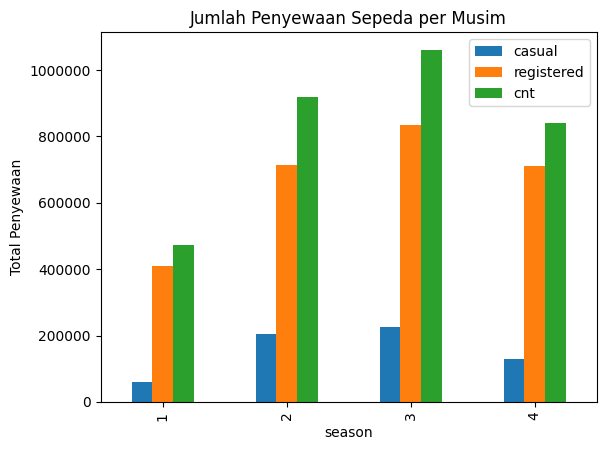

In [348]:
# Kita Jumlahlahkan hasil dengan deklarasi variabel baru agar lebih mudah
season_analysis_result = season_analysis.groupby('season').sum()
#
ax = season_analysis_result.plot.bar()

# Menambahkan judul dan label pada sumbu X dan Y masing masing
ax.set_title('Jumlah Penyewaan Sepeda per Musim')
ax.set_ylabel('Total Penyewaan')

ax.ticklabel_format(style='plain', axis='y')
plt.show()

### Pertanyaan 2: Bagaimana hubungan jumlah penyewa sepeda pada saat holiday serta weekend dengan hari kerja

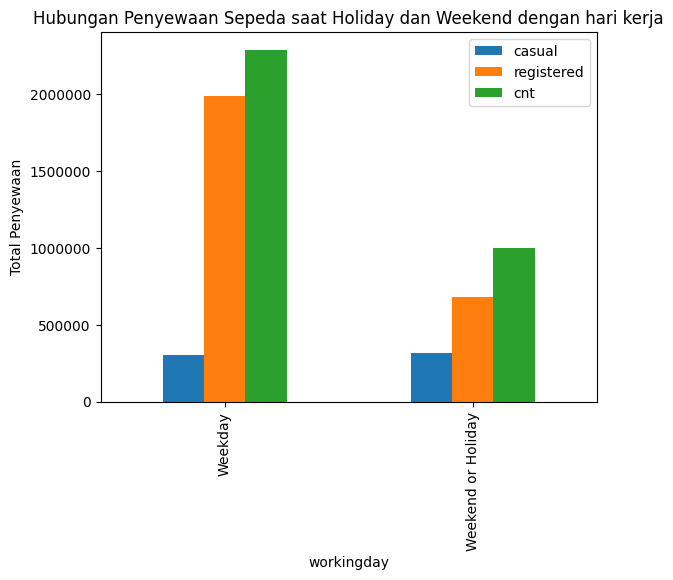

In [349]:
# Kita Jumlahlahkan hasil dengan deklarasi variabel baru agar lebih mudah
workingday_analysis_result = workingday_analysis.groupby('workingday').sum()
#
ax = workingday_analysis_result.plot.bar()

# Menambahkan judul dan label pada sumbu X dan Y masing masing
ax.set_title('Hubungan Penyewaan Sepeda saat Holiday dan Weekend dengan hari kerja')
ax.set_ylabel('Total Penyewaan')

ax.ticklabel_format(style='plain', axis='y')
plt.show()

### Pertanyaan 3: Bagaimana hubungan holiday, dengan tidak holiday terhadap jumlah penyewa sepeda

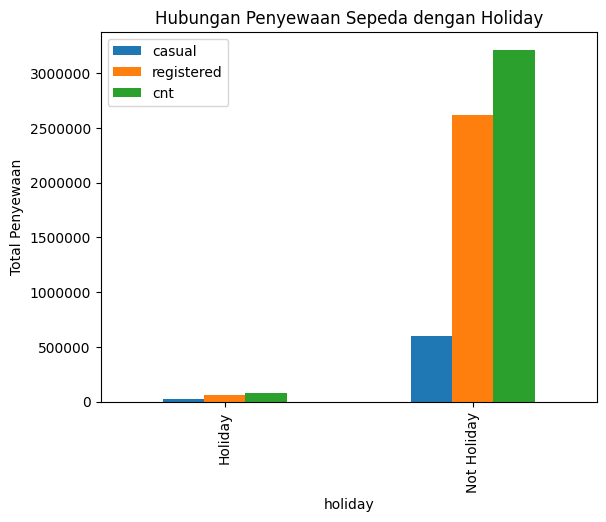

In [350]:
# Kita Jumlahlahkan hasil dengan deklarasi variabel baru agar lebih mudah
holiday_analysis_result = holiday_analysis.groupby('holiday').sum()
#
ax = holiday_analysis_result.plot.bar()

# Menambahkan judul dan label pada sumbu X dan Y masing masing
ax.set_title('Hubungan Penyewaan Sepeda dengan Holiday')
ax.set_ylabel('Total Penyewaan')

ax.ticklabel_format(style='plain', axis='y')
plt.show()

### Pertanyaan 4: Bagaimana performa bike sharing dari tahun ke tahun

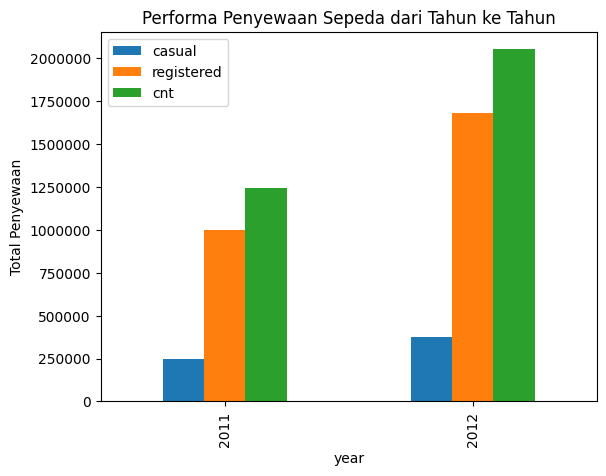

In [351]:
year_analysis_result = result

ax = result.plot.bar()

# Menambahkan judul dan label pada sumbu X dan Y masing masing
ax.set_title('Performa Penyewaan Sepeda dari Tahun ke Tahun')
ax.set_ylabel('Total Penyewaan')

ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [356]:
day_df.to_csv("all_data.csv", index=False)

**Insight:**
-Setelah melakukan visualisasi kita mendapatkan beberapa kesimpulan dan hubungan antara musim dengan penggunaan atau penyewaan sepeda
- Kita juga mendapatkan visualisasi dan kesimpulan hubungan saat holiday atau tidak dengan penyewaan sepeda
- Serta yang terakhir mendapatkan visualisai penyewaan sepeda pada tahun 2011 dan 2012

## Analisis Lanjutan (Opsional)

      dteday   cnt cnt_category
0 2011-01-01   985     Very Low
1 2011-01-02   801     Very Low
2 2011-01-03  1349          Low
3 2011-01-04  1562          Low
4 2011-01-05  1600          Low


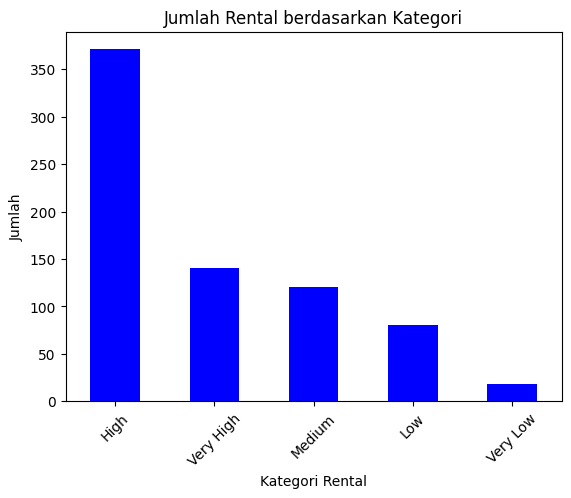

In [353]:
#Clustering dengan metode binning
#Membuat kategori Tertentu disini membagi menjadi 5 kategori tertentu dimana maksium 9000 karena max dari cnt 8700
bins = [0, 1000, 2000, 3500, 6500, 9000]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Membuat kolom baru untuk kategori
day_df['cnt_category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels, right=False)

# Menampilkan hasil binning untuk mengecek tiap count termasuk dalam kategori mana sehingga nanti mudah di kategorikan
print(day_df[['dteday', 'cnt', 'cnt_category']].head())

# Menghitung jumlah berdasarkan kategori
category_counts = day_df['cnt_category'].value_counts()

# Visualisasi hasil
category_counts.plot(kind='bar', color='blue')
plt.title('Jumlah Rental berdasarkan Kategori')
plt.xlabel('Kategori Rental')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

In [354]:
# Buat analisis berdasarkan kategori
categorycnt_analysis = day_df[['cnt_category', 'cnt']]

# Hitung berapa kali `cnt` masuk dalam setiap kategori
categorycnt_count = categorycnt_analysis.groupby('cnt_category').size()

# Tampilkan hasil
print(categorycnt_count)

cnt_category
Very Low      18
Low           80
Medium       121
High         371
Very High    141
dtype: int64


<ipython-input-354-69ce9360314c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categorycnt_count = categorycnt_analysis.groupby('cnt_category').size()


## Conclusion

- Conclution pertanyaan 1, Fall atau Musim gugur memiliki jumlah pengguna sepeda tertinggi dengan total 1.061.129 pengguna, terdiri dari 226.091 pengguna tidak terdaftar dan 835.038 pengguna terdaftar. kemudian Summer atau musim panas mengikuti Fall(Musim gugur) dengan jumlah total 918.589 pengguna, di mana 203.522 adalah pengguna tidak terdaftar dan 715.067 pengguna terdaftar. kemudian pada musim Winter (musim dingin) memiliki total 841.613 pengguna, dengan pengguna 711.831 adalah pengguna terdaftar dan 129.782 adalah pengguna tidak terdaftar. dan terakhir musim Springer (musim semi) memiliki jumlah pengguna terendah yaitu 471.348, dengan 60.622 pengguna tidak terdaftar dan 410.726 pengguna terdaftar. Berdasarkan kesimpulan diatas dapat disimpulkan bahwa pada musim gugur akan memiliki pengguna atau penyewa terbanyak dibanding dengan musim lainnya terlebih pada musim semi hanya setengah dari musim gugur jadi dapat disimpulkan bahwasannya musim akan berpengaruh terhadap penyewaan sepeda hal tersebut mungkin dapat disebabkan oleh faktor cuaca.
- Conclution pertanyaan 2, diketahui bahwa pada hari kerja terdata 303.285 pengguna atau penyewa casual, kemudian 1.989.125 penyewa terdaftar dan total 2.292.410 penyewa sepeda pada hari kerja. dan pada akhir pekan atau hari libur (holiday) terdata 316.732 pengguna casual, 683.537 pengguna terdaftar dan total 1.000.269 penyewa sepeda pada hari weekend atau holiday. dari data diatas dapat disimpulkan bahwa penyewa lebih banyak pada hari kerja dibandingkan pada weekend atau akhir pekan dan holiday, namun pengguna casual lebih banyak pada saat weekend or holiday dibandingkan pada saat hari kerja.
- Conclution pertanyaan 3. pada saat holiday hanya terdapat 22.359 pengguna casual dan 56.076 pengguna terdaftar serta total 78.435 dibandingkan dengan tidak holiday terdapat 597.658 pengguna casual dan 2.616.586 pengguna terdaftar. disini dapat disimpulkan bahwa pada saat holiday penyewa terhitung sangat sedikit bahkan data diatas adalah data dalam 2 tahun.
- Conclution pertanyaan 4. pada tahun 2011 terdapat 247.352 pengguna casual. 995.851 pengguna terdaftar dengan total 1.243.103 penyewa sepeda pada tahun 2011, sedangkan pada tahun 2012 terdata 372.765 pengguna casual, dan 1.676.1811 pengguna terdaftar dengan total 2.049.576 penyewa sepeda. Dari data diatas dapat disimpulkan penyewa sepeda meningkat dari tahun 2011 ke tahun 2012 sangat signifikan hal ini dapat diprediksi untuk tahun 2013 akan mengalami hal yang sama.